In [1]:
from utils.augment import get_training_augmentation
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [2]:
def visualize_ir(img, colorbar='False', save_path=None):
    plt.imshow(img, cmap='cividis')

    if colorbar:
        plt.colorbar()
    
    if not save_path==None:
        cv2.imwrite(save_path, img)

In [32]:
images = np.load('E:/polar/code/data/ir/entire/original_size/prepared/256_im.npy')
masks = np.load('E:/polar/code/data/ir/entire/original_size/prepared/256_ma.npy')


In [4]:
def preprocess(images, masks):
    ######## Reshape Input ############
    print(images[0].dtype)
    print("Original im shape ...", images.shape)
    
    # sm.unet expects 3 channel input
    images = np.stack((images,)*3, axis=-1)

    print("New im shape ...", images.shape)
    print("Original masks shape ...", masks.shape)

    masks = np.expand_dims(masks, -1)
    masks = to_categorical(masks, num_classes=3)

    print("New masks shape ...", masks.shape)
    print("Pixel values in the mask are: ", np.unique(masks))

    return images, masks


In [33]:
ims, mas = images, masks

In [12]:
print(ims.shape[0])

32


In [34]:
print(ims[0].shape)

(256, 256)


In [16]:
from utils.augment import get_training_augmentation

In [11]:
trans = get_training_augmentation()
print(type(trans))
print(ims[0]))

<class 'albumentations.core.composition.Compose'>
<class 'numpy.ndarray'>


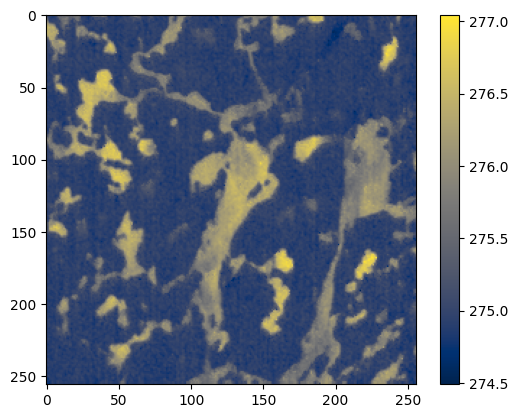

In [35]:
visualize_ir(ims[3])

In [17]:
import albumentations as A

In [98]:
train_transform = A.Compose([

        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        # crop border so original shapes
        A.Rotate(p=1, interpolation=0, crop_border=True)
        #A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),
        #A.PadIfNeeded(min_height=256, min_width=256, always_apply=True, border_mode=0)
])

In [99]:
im_augmented=[]
ma_augmented=[]

for i in range(0,ims.shape[0]):
    print(ims[i].shape)
    sample = train_transform(image=ims[i],mask=mas[i])
    im_aug, ma_aug = sample['image'], sample['mask']
    im_augmented.append(im_aug)
    ma_augmented.append(ma_aug)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


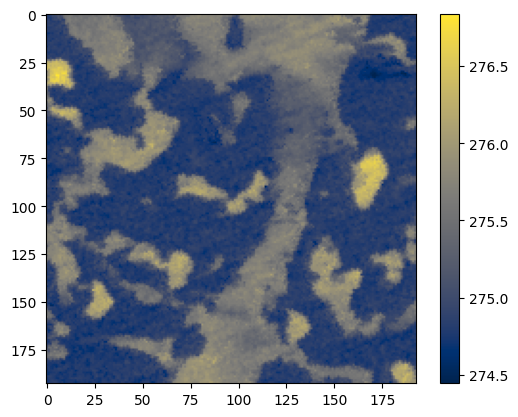

In [100]:
visualize_ir(im_augmented[10])

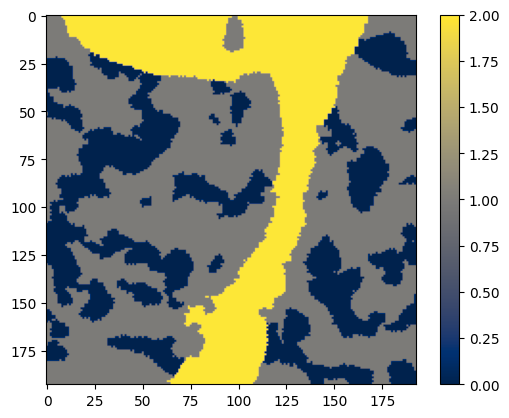

In [101]:
visualize_ir(ma_augmented[10])